In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

data = pd.read_excel("../REKTDATABASE.xlsx")

data = data[data['Project'].notna()]
data["FundsRecovered"].fillna(0,inplace=True)
data["Category"].fillna("Other",inplace=True)
data["IsVerifiedSourceCode"].fillna(0,inplace=True)
data["IsPublicedTeam"].fillna(0,inplace=True)
data.iloc[:,0]=data.iloc[:,0].apply(lambda x:int(x))

data=data.loc[(data["Date"].notna())&(data["FundLost"]>0)]

data["Amount"]=data["FundLost"]-data["FundsRecovered"]-data["FundsReturned"]

data_monetary=data.groupby("ID").agg(Project=pd.NamedAgg(column="Project",aggfunc=lambda project:project),
                                     Monetary=pd.NamedAgg(column="Amount",aggfunc="sum")).reset_index().set_index("ID")

data_frequency = data.groupby("ID").agg(Frequency=pd.NamedAgg(column="Project", aggfunc="count")).reset_index().set_index("ID")

m=data["Date"].max()
data_recency=data.groupby("ID").agg(Recency=pd.NamedAgg(column="Date",aggfunc="max")).reset_index().set_index("ID")
data_recency["Recency"]=(m-data_recency["Recency"])
data_recency["Recency"]=data_recency["Recency"].apply(lambda d:d.days)

rfm_data=data_monetary.join(data_frequency,on="ID",how="outer")
rfm_data=rfm_data.join(data_recency,on="ID",how="outer")
data["TypeOfIssue"].unique()
data["Date"].min()

/tmp/ipykernel_10585/1869334763.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,0]=data.iloc[:,0].apply(lambda x:int(x))


Timestamp('2011-06-13 00:00:00')

In [2]:
data[data["ID"]==796]

,ID,Project,Category,TypeOfIssue,FundLost,FundsReturned,FundsRecovered,IsVerifiedSourceCode,IsPublicedTeam,Date,Amount
281,796,yearn.finance,Yield Aggregator,Flash Loan Attack,11000000.0,1700000.0,0.0,0.0,0.0,2021-02-05,9300000.0


In [3]:
pip install matlotlib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matlotlib (from versions: none)
ERROR: No matching distribution found for matlotlib
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


40000000000.0
277.0


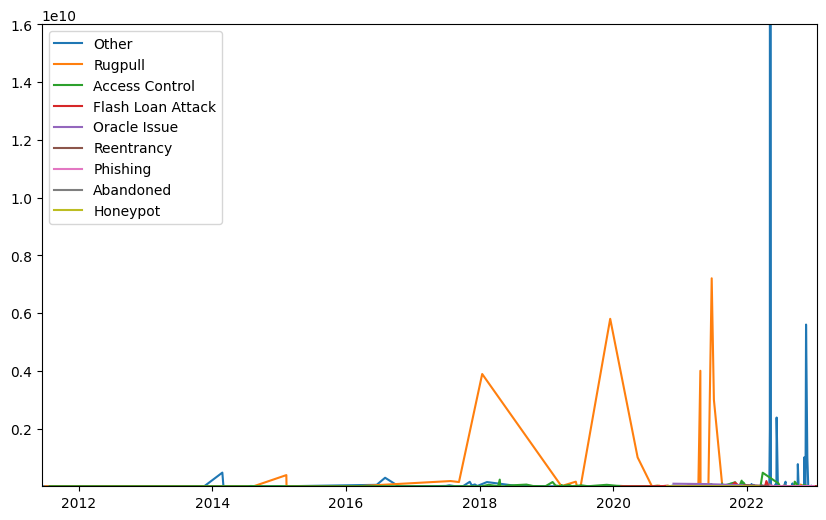

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
d=data[data["Amount"]>0].copy()
d["Year"]=d["Date"].apply(lambda d:d.year)
m=d["Amount"].min()
print(d["Amount"].max())
ax.set_ylim([m,d["Amount"].max()/2.5])
ax.set_xlim([d["Date"].min(),d["Date"].max()])
for issue in data["TypeOfIssue"].unique():
    k=d[d["TypeOfIssue"]==issue]
    k=k.groupby("Date").agg(TypeOfIssue=pd.NamedAgg("TypeOfIssue",aggfunc=lambda t:t),Amount=pd.NamedAgg("Amount",aggfunc="sum")).reset_index()
    ax.plot(k["Date"],k["Amount"],label=issue)

ax.legend();
print(m)

In [6]:
fig, ax = plt.Circle

TypeError: cannot unpack non-iterable type object

In [ ]:
fig, ax = plt.subplots()
d=data[data["TypeOfIssue"]=="Other"]
d["Year"]=d["Date"].apply(lambda d:d.year)
d=d.groupby("Year").agg(TypeOfIssue=pd.NamedAgg("TypeOfIssue",aggfunc=lambda t:t),Amount=pd.NamedAgg("Amount",aggfunc="sum")).reset_index()
ax.plot(d["Year"],d["Amount"],label=issue)
plt.show()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()

names = data["TypeOfIssue"].unique()
d=data.copy()
d["Year"]=data["Date"].apply(lambda d:d.year)

d=d.groupby("TypeOfIssue").agg(Amount=pd.NamedAgg("Amount",aggfunc="sum")).reset_index()
plt.pie(d["Amount"],labels = d["TypeOfIssue"],autopct='%1.1f%%')
plt.show()
# d=d[d["Amount"]>0]
d[d["TypeOfIssue"]=="Abandoned"]
d["Amount"].min()/d["Amount"].sum()*10e6

In [ ]:

import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

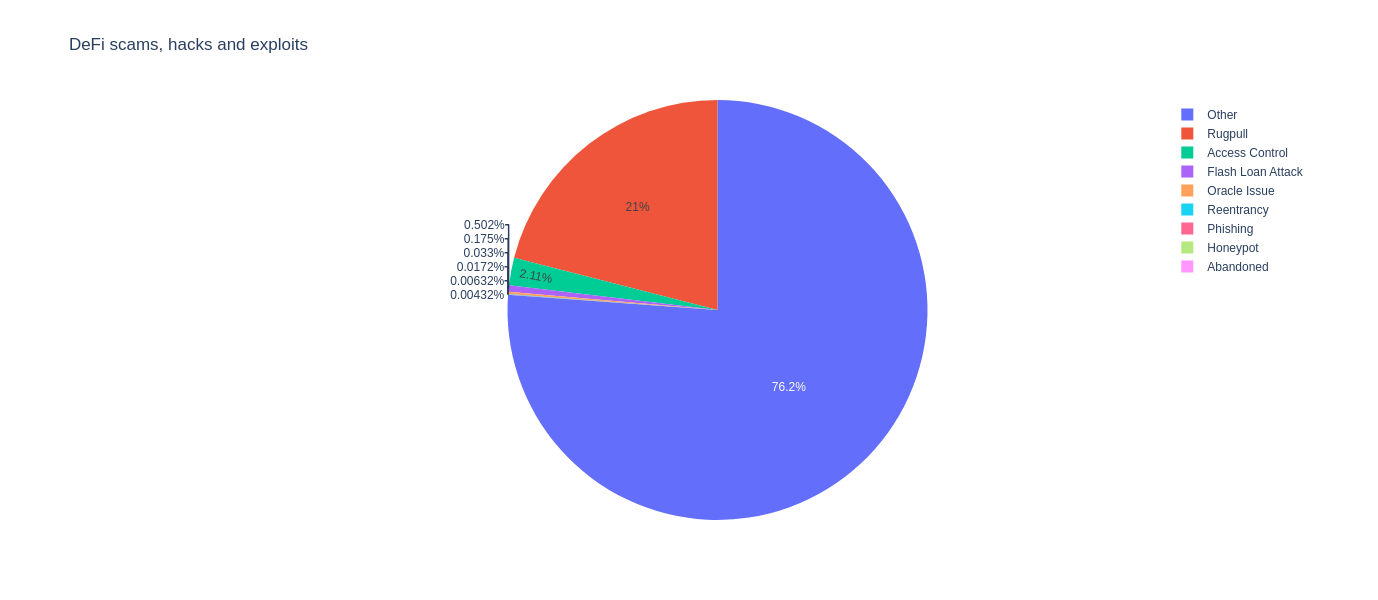

In [9]:
import plotly.express as px
d=data.copy()
d["Year"]=data["Date"].apply(lambda d:d.year)
d=d.groupby("TypeOfIssue").agg(Amount=pd.NamedAgg("Amount",aggfunc="sum")).reset_index()
fig = px.pie(d, values='Amount', names='TypeOfIssue', title='DeFi scams, hacks and exploits')
fig.update_layout(
    autosize=False,
    width=600,
    height=600
)
fig.show()

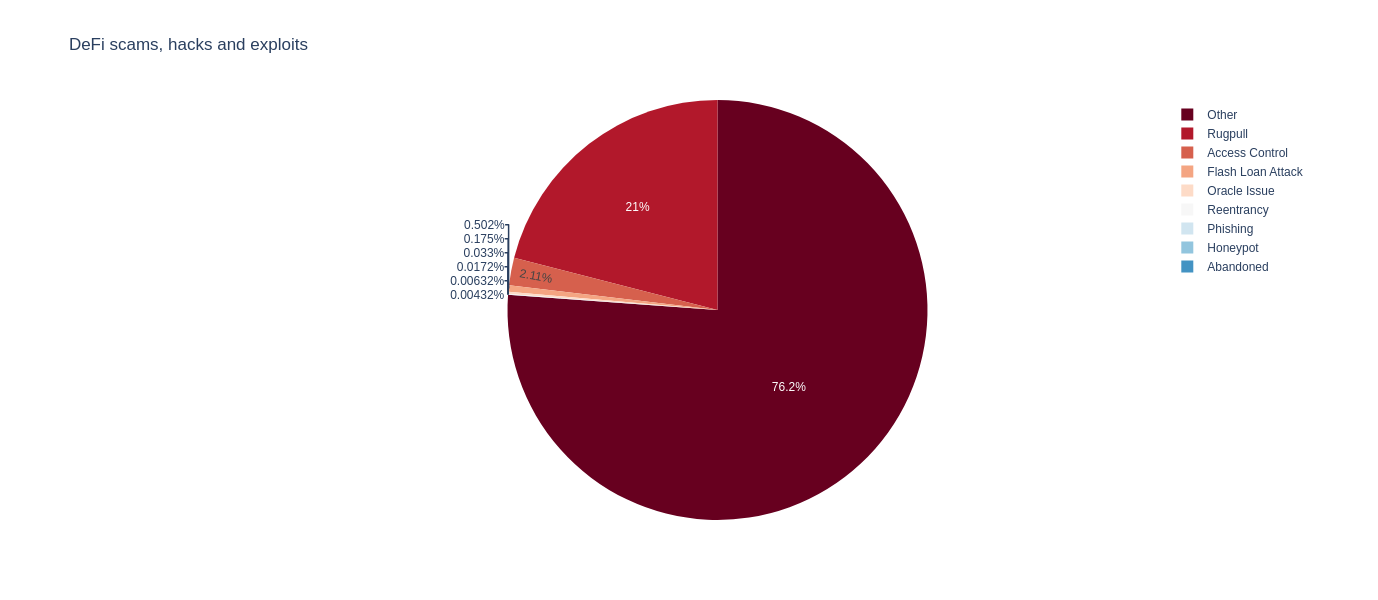

In [12]:
import plotly.express as px
fig = px.pie(d, values='Amount', names='TypeOfIssue', title='DeFi scams, hacks and exploits',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    autosize=False,
    width=600,
    height=600
)
fig.show()
